## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing Libraries and Data
#### 2. Data Prep for Regression Analysis
#### 3. Regression Analysis

### 1. Importing Libraries and Data


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df_5 = pd.read_csv('/Users/selcenayranci/Desktop/2023 NYC Airbnb Analysis/02.Data/Prepared Data/airbnb_2023_v3.csv')

In [5]:
df_5.columns

Index(['ID', 'Name', 'Neighbourhood Group', 'Neighbourhood', 'Latitude',
       'Longitude', 'Room Type', 'Price', 'Min Nights', 'No of Reviews',
       'Last Review', 'Reviews Per Month', 'Calculated Host Listings',
       'Availability', 'No of Reviews LTM', 'Neighbourhood Group Code',
       'Room Type Code'],
      dtype='object')

### 2. Data Prep for Regression Analysis

#### Hypothesis: The listings with more reviews will be more expensive.

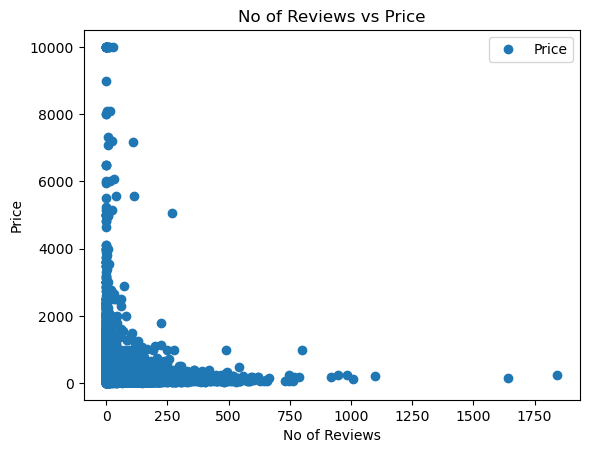

In [6]:
# Creating a scatterplot to see how the chosen variables plot against each other

df_5.plot(x = 'No of Reviews', y='Price', style='o') 
plt.title('No of Reviews vs Price')  
plt.xlabel('No of Reviews')  
plt.ylabel('Price')  
plt.show()

In [7]:
# Reshaping the variables into NumPy arrays and putting them into separate objects

X = df_5['No of Reviews'].values.reshape(-1,1)
y = df_5['Price'].values.reshape(-1,1)

In [8]:
X

array([[ 49],
       [ 50],
       [118],
       ...,
       [  0],
       [  0],
       [  0]])

In [9]:
y

array([[150],
       [ 60],
       [ 75],
       ...,
       [127],
       [280],
       [ 78]])

In [10]:
# Splitting data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 3. Regression Analysis

In [11]:
# Creating a regression object

regression = LinearRegression()  

In [12]:
# Fitting the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predicting the values of y using X

y_predicted = regression.predict(X_test)

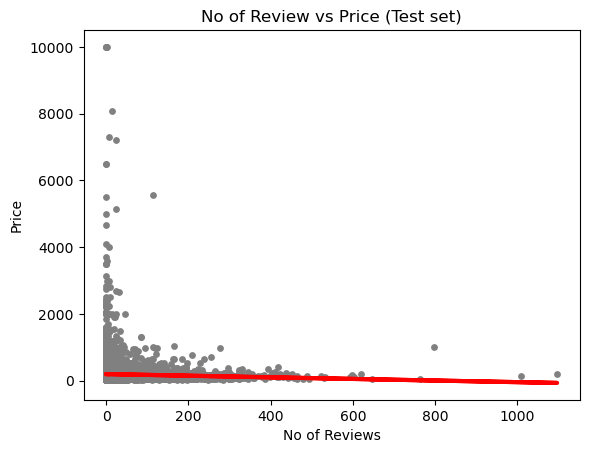

In [14]:
# Creating a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('No of Review vs Price (Test set)')
plot_test.xlabel('No of Reviews')
plot_test.ylabel('Price')
plot_test.show()

We can see immediately that the linear model represented by the red regression line hardly covers all of the data points. Almost all the high prices are have the lowest (even 0) reviews.

In [15]:
# Creating objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [16]:
# Printing the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.2411145]]
Mean squared error:  109011.61089458951
R2 score:  0.0017923006978336486


The **slope** is a coefficient that tells how the y variable changes when X changes. A negative slope value indicates a negative relationship (as X rises, y drops). Here, there is a negative relationship, so the coefficient is negative too. The slope here means that as number of reviews rises, prices slightly drops at a degree of 0.24.

The **root mean squared error** is an estimator that measures the average of the squared difference between the estimated values and the true values. In other words, it tells how close a regression line is to a set of points (i.e., its accuracy). The larger the distance, the farther away the regression line is from the data points, indicating that the regression line isn’t an accurate representation of the data. In this case, the MSE is quite large at 109011. From this, it’s safe to say that a regression is definetly not the best model to represent this data and can’t accurately predict the influence of number of reviews on the price of an accomodation.

**R2 score** is a metric that tells how well the model explains the variance in the data. It’s a number (usually) between 0 and 1, where values closer to 0 indicate a poor fit, and values closer to 1 indicate a good fit. The R2 score for the model is 0.0017 which is  very close to 0 which means that the model is not a good fit at all. 

**In summary, the number of reviews is not a good predictor of the price for my analysis.** 

In [17]:
# Creating a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,150,197.310814
1,126,197.793043
2,269,197.310814
3,254,198.034157
4,825,190.559608
5,25,197.551928
6,105,187.666234
7,48,195.381898
8,110,175.851623
9,1100,195.623012


#### Hypothesis: The less available a listing is, higher its price will be.

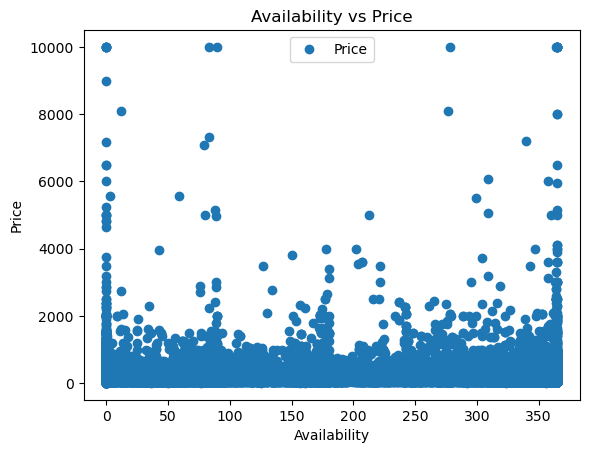

In [18]:
# Creating a scatterplot to see how the chosen variables plot against each other

df_5.plot(x = 'Availability', y='Price', style='o') 
plt.title('Availability vs Price')  
plt.xlabel('Availability')  
plt.ylabel('Price')  
plt.show()

In [19]:
# Reshaping the variables into NumPy arrays and put them into separate objects

X = df_5['Availability'].values.reshape(-1,1)
y = df_5['Price'].values.reshape(-1,1)

In [20]:
# Spliting data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
# Creating a regression object

regression = LinearRegression()

In [22]:
# Fitting the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predicting the values of y using X

y_predicted = regression.predict(X_test)

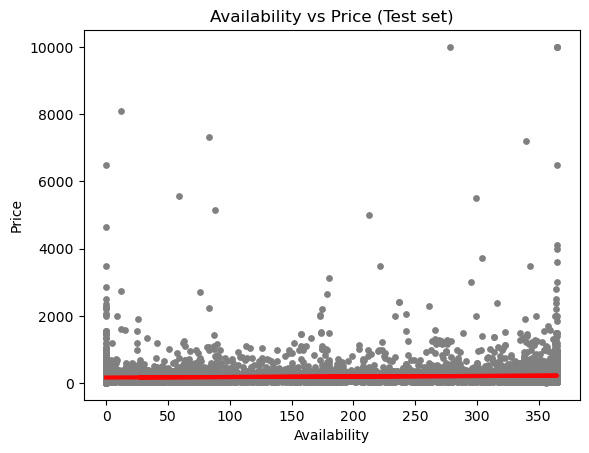

In [24]:
# Creating a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Availability vs Price (Test set)')
plot_test.xlabel('Availability')
plot_test.ylabel('Price')
plot_test.show()

We can see that the linear model represented by the red regression line doesn't cover all of the data points. However, the nature of the relationship between the variables is not very clear yet.

In [25]:
# Creating objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [26]:
# Printing the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.15156558]]
Mean squared error:  108430.20073622321
R2 score:  0.007116211534220929


**Slope** value shows us that there is a positive relationship meaning that as an accomodation has more availability, prices slightly increase at a degree of 0.15.

Regarding **MSE**, it is again quite large at 108430. From this, it’s safe to say that a regression is definetly not the best model to represent this data and can’t accurately predict the influence of availability on the price of an accomodation.

The **R2 score** for the model is 0.0071 which is again very close to 0 which means that the model is not a good fit at all.

**In summary, availability is not a good predictor of the price of an accomodation.**

In [27]:
# Creating a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,150,170.435968
1,126,202.113174
2,269,225.757404
3,254,225.151141
4,825,184.076870
5,25,170.435968
6,105,176.953288
7,48,208.175797
8,110,170.435968
9,1100,194.989592


#### Hypothesis: Higher the required min stay is, higher its price will be.

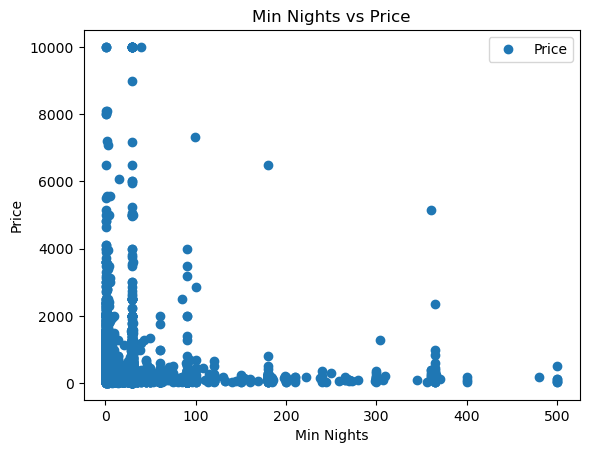

In [28]:
# Creating a scatterplot to see how the chosen variables plot against each other

df_5.plot(x = 'Min Nights', y='Price', style='o') 
plt.title('Min Nights vs Price')  
plt.xlabel('Min Nights')  
plt.ylabel('Price')  
plt.show()

In [29]:
df_5.loc[df_5['Min Nights'] == 0]

,ID,Name,Neighbourhood Group,Neighbourhood,Latitude,Longitude,Room Type,Price,Min Nights,No of Reviews,Last Review,Reviews Per Month,Calculated Host Listings,Availability,No of Reviews LTM,Neighbourhood Group Code,Room Type Code


In [30]:
# Reshaping the variables into NumPy arrays and put them into separate objects

X = df_5['Min Nights'].values.reshape(-1,1)
y = df_5['Price'].values.reshape(-1,1)

In [31]:
# Spliting data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [32]:
# Creating a regression object

regression = LinearRegression()

In [33]:
# Fitting the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [34]:
# Predicting the values of y using X

y_predicted = regression.predict(X_test)

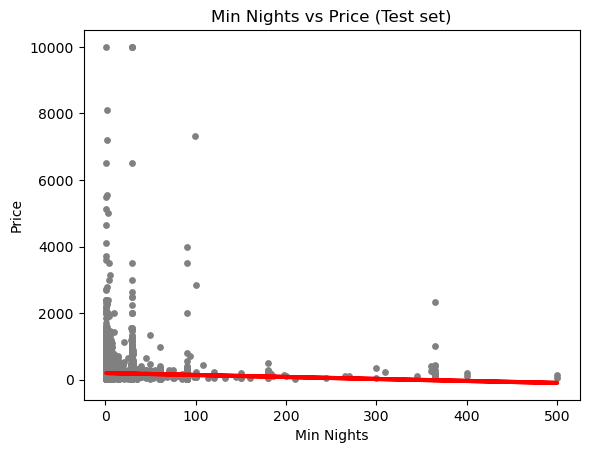

In [35]:
# Creating a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Min Nights vs Price (Test set)')
plot_test.xlabel('Min Nights')
plot_test.ylabel('Price')
plot_test.show()

Like previously, the linear model represented by the red regression line hardly covers all of the data points. Almost all the high prices are have the shortest required minumum stay.

In [36]:
# Creating objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [37]:
# Printing the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.59582526]]
Mean squared error:  109039.71522496852
R2 score:  0.0015349523407381938


**Slope** value shows us that there is a noticable negative relationship meaning that as required minimum stay has increases, prices slightly decrease at a degree of 0.59.

Regarding **MSE**, it is again quite large at 109039. Therefore, we can say that a regression is  not the best model to represent this data and can’t accurately predict the influence of required minimum stay on the price of an accomodation.

The **R2 score** for the model is 0.0015. It is very close to 0 which means that the model is not a good fit again.

**In summary, required minimum nights is not a good predictor of the price of an accomodation.**

In [39]:
# Exporting the data

df_5.to_csv('/Users/selcenayranci/Desktop/2023 NYC Airbnb Analysis/02.Data/Prepared Data/airbnb_2023_v4.csv', index=False)